#  Analyzing Immigration to Canada from 1980 to 2013 <a id="2"></a>

Dataset Source: [International migration flows to and from selected countries - The 2015 revision](http://www.un.org/en/development/desa/population/migration/data/empirical2/migrationflows.shtml?utm_medium=Exinfluencer\&utm_source=Exinfluencer\&utm_content=000026UJ\&utm_term=10006555\&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01).

The dataset contains annual data on the flows of international immigrants as recorded by the countries of destination. The data presents both inflows and outflows according to the place of birth, citizenship or place of previous / next residence both for foreigners and nationals. The current version presents data pertaining to 45 countries.

The Canada Immigration dataset can be fetched from <a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01">here</a>.

In [20]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Data Collection

In [21]:
can_df = pd.read_excel('../data/canada.xlsx', 
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2
                      )
can_df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [22]:
can_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Type      195 non-null    object
 1   Coverage  195 non-null    object
 2   OdName    195 non-null    object
 3   AREA      195 non-null    int64 
 4   AreaName  195 non-null    object
 5   REG       195 non-null    int64 
 6   RegName   195 non-null    object
 7   DEV       195 non-null    int64 
 8   DevName   195 non-null    object
 9   1980      195 non-null    int64 
 10  1981      195 non-null    int64 
 11  1982      195 non-null    int64 
 12  1983      195 non-null    int64 
 13  1984      195 non-null    int64 
 14  1985      195 non-null    int64 
 15  1986      195 non-null    int64 
 16  1987      195 non-null    int64 
 17  1988      195 non-null    int64 
 18  1989      195 non-null    int64 
 19  1990      195 non-null    int64 
 20  1991      195 non-null    int64 
 21  1992      195 no

## Data Cleaning

In [23]:
can_df.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)

can_df.rename(columns = {'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'},inplace=True)

can_df.head(2)

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603


In [24]:
can_df['Total'] = can_df.iloc[:,4:].sum(axis=1)

In [25]:
can_df.set_index('Country', inplace=True)

Column names that are integers (such as the years) might introduce some confusion. For example, when we are referencing the year 2013, one might confuse that when the 2013th positional index. To avoid this ambuigity, let's convert the column names into strings.

In [26]:
can_df.columns = list(map(str, can_df.columns))
# to facilitate plotting
years = list(map(str, range(1980, 2014)))

I'll change the name of 'United Kingdom of Great Britain and Northern Ireland' countries to 'UK' so it fit the plotting area in a figure

In [27]:
new_index = []
for country in can_df.index:
    if country == 'United Kingdom of Great Britain and Northern Ireland':
        country ='UK'
    new_index.append(country)
    
can_df.index = new_index

## Exploratory Data Analysis

In [28]:
can_df.describe()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,508.394872,566.989744,534.723077,387.435897,376.497436,358.861538,441.271795,691.133333,714.389744,843.241026,...,1320.292308,1266.958974,1191.820513,1246.394872,1275.733333,1420.287179,1262.533333,1313.958974,1320.702564,32867.451282
std,1949.588546,2152.643752,1866.997511,1204.333597,1198.246371,1079.309600,1225.576630,2109.205607,2443.606788,2555.048874,...,4425.957828,3926.717747,3443.542409,3694.573544,3829.630424,4462.946328,4030.084313,4247.555161,4237.951988,91785.498686
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,1.000000,1.000000,...,28.500000,25.000000,31.000000,31.000000,36.000000,40.500000,37.500000,42.500000,45.000000,952.000000
50%,13.000000,10.000000,11.000000,12.000000,13.000000,17.000000,18.000000,26.000000,34.000000,44.000000,...,210.000000,218.000000,198.000000,205.000000,214.000000,211.000000,179.000000,233.000000,213.000000,5018.000000
75%,251.500000,295.500000,275.000000,173.000000,181.000000,197.000000,254.000000,434.000000,409.000000,508.500000,...,832.000000,842.000000,899.000000,934.500000,888.000000,932.000000,772.000000,783.000000,796.000000,22239.500000
max,22045.000000,24796.000000,20620.000000,10015.000000,10170.000000,9564.000000,9470.000000,21337.000000,27359.000000,23795.000000,...,42584.000000,33848.000000,28742.000000,30037.000000,29622.000000,38617.000000,36765.000000,34315.000000,34129.000000,691904.000000


### Making function to avoid repeating the code

In [36]:
def make_basic_continent_stat(continent):
    """a function that takes a name of a continent and return the basic statistics of the immigration numbers
        of the continent"""
    print(f'{continent} Total Immigration Basic Staistics')
    df = can_df[can_df['Continent']==continent]['Total'].describe()
    return df

def make_basic_stat(continent,k):
    """a function that takes a name of a continent and return the basic statistics of the immigration numbers
        of the top 3 countries in that continent"""
    df = (can_df[can_df['Continent']==continent]. 
         sort_values('Total',ascending=False).
         head(k).
         loc[:,years].T).describe()
    return df

def make_bar_pie_df(continent,k):
    """a function that takes a name of a continent and return a dataframe that shows the total number 
        of immigrants of the top 3 countries in a continent with those countries as index. This dataframe
        is suaitbale for bar chart and pie chart plots"""
    df = can_df[can_df['Continent']==continent]['Total'].\
         to_frame().\
         sort_values('Total',ascending=False).\
         head(k)
    return df

def make_line_box_df(continent,k):
    """a function that takes a name of a continent and return a dataframe that show the name of the 
        country and the number of immigrants for the top 3 countries in the continent with years as index.
        This dataframe is suitable for box and line plots"""
    df = (can_df[can_df['Continent']==continent]. 
         sort_values('Total',ascending=False).
         head(k).
         loc[:,years].T)
    
    df.columns.name=''
    
    df.reset_index(inplace=True)
    df.rename(columns={'index':'Year'}, inplace=True)
    
    df= df.melt(id_vars='Year',var_name='Country',value_name='Number of Immigrants').\
          set_index('Year')
    df.index = [int(val) for val in df.index]
         
    return df
   
def make_vis(df1,df2,continent,k):
    """a function takes in 2 dataframes and returns visualizations of the immigration numbers in df1 and df2"""
    chart_order = df1.index
    plt.figure(figsize=(26,18), facecolor='#C4A484')
    plt.suptitle(f"Visalization of Immigrants Numbers from Top {k} Countries in {continent} (1980-2013)",size=22)

    plt.subplot(2,2,1)
    sns.barplot(x=df1.index,
                y='Total',
                data=df1,
                order=chart_order)
    plt.title('Bar Plot', size=20)
    plt.xlabel('Country',size=18,color='black')
    plt.ylabel('Number of Immigrants',size=18,color='black')
    plt.xticks(size = 14)
    plt.yticks(size = 14)

    
    plt.subplot(2,2,2)
    plt.pie(x = df1['Total'],
            labels = df1.index,
            radius= 1.1,
            startangle= 90,
            counterclock= False,
            autopct= '%2.1F%%',
            textprops={'fontsize': 18})
    plt.title('Pie Plot', size=20)


    plt.subplot(2,2,3)
    sns.boxplot(x='Number of Immigrants', 
                y = 'Country',
                data=df2)
    plt.title('Box Plot', size = 20)
    plt.xlabel('Number of Immigrants', size = 18,color='black')
    plt.ylabel('Country', size = 18,color='black')
    plt.xticks(size = 14)
    plt.yticks(size = 14)


    plt.subplot(2,2,4)
    ax = sns.lineplot(data=df2, 
                      x = df2.index,
                      y='Number of Immigrants', 
                      hue='Country')
    plt.title('Line Plot',size=20)
    plt.xlabel('Year', size=18,color='black')
    plt.ylabel('Number of Immigrants',size=18,color='black')
    plt.xticks(size = 14)
    plt.yticks(size = 14)	
    plt.setp(ax.get_legend().get_texts(), fontsize='18') 
    plt.setp(ax.get_legend().get_title(), fontsize='22')

## Analysis of Immigration from Africa

__Continent Basic Statistics__

In [30]:
make_basic_continent_stat('Africa')

Africa Total Immigration Basic Staistics


count       54.000000
mean     11462.000000
std      18410.630212
min          2.000000
25%        690.250000
50%       2805.500000
75%      14891.500000
max      72745.000000
Name: Total, dtype: float64

Top 3 Countries in Africa Basic Statistics

In [31]:
make_basic_stat('Africa',3)

,Egypt,Morocco,Algeria
count,34.000000,34.000000,34.000000
mean,2139.558824,2125.500000,2042.323529
std,1393.809478,1724.108171,1771.709374
min,348.000000,248.000000,44.000000
25%,1158.250000,666.250000,290.000000
50%,2088.000000,1287.500000,1948.000000
75%,2544.750000,3606.750000,3621.250000
max,5982.000000,6242.000000,5393.000000


Visualization of the Immigration Statistics of Top 3 Countries in Africa

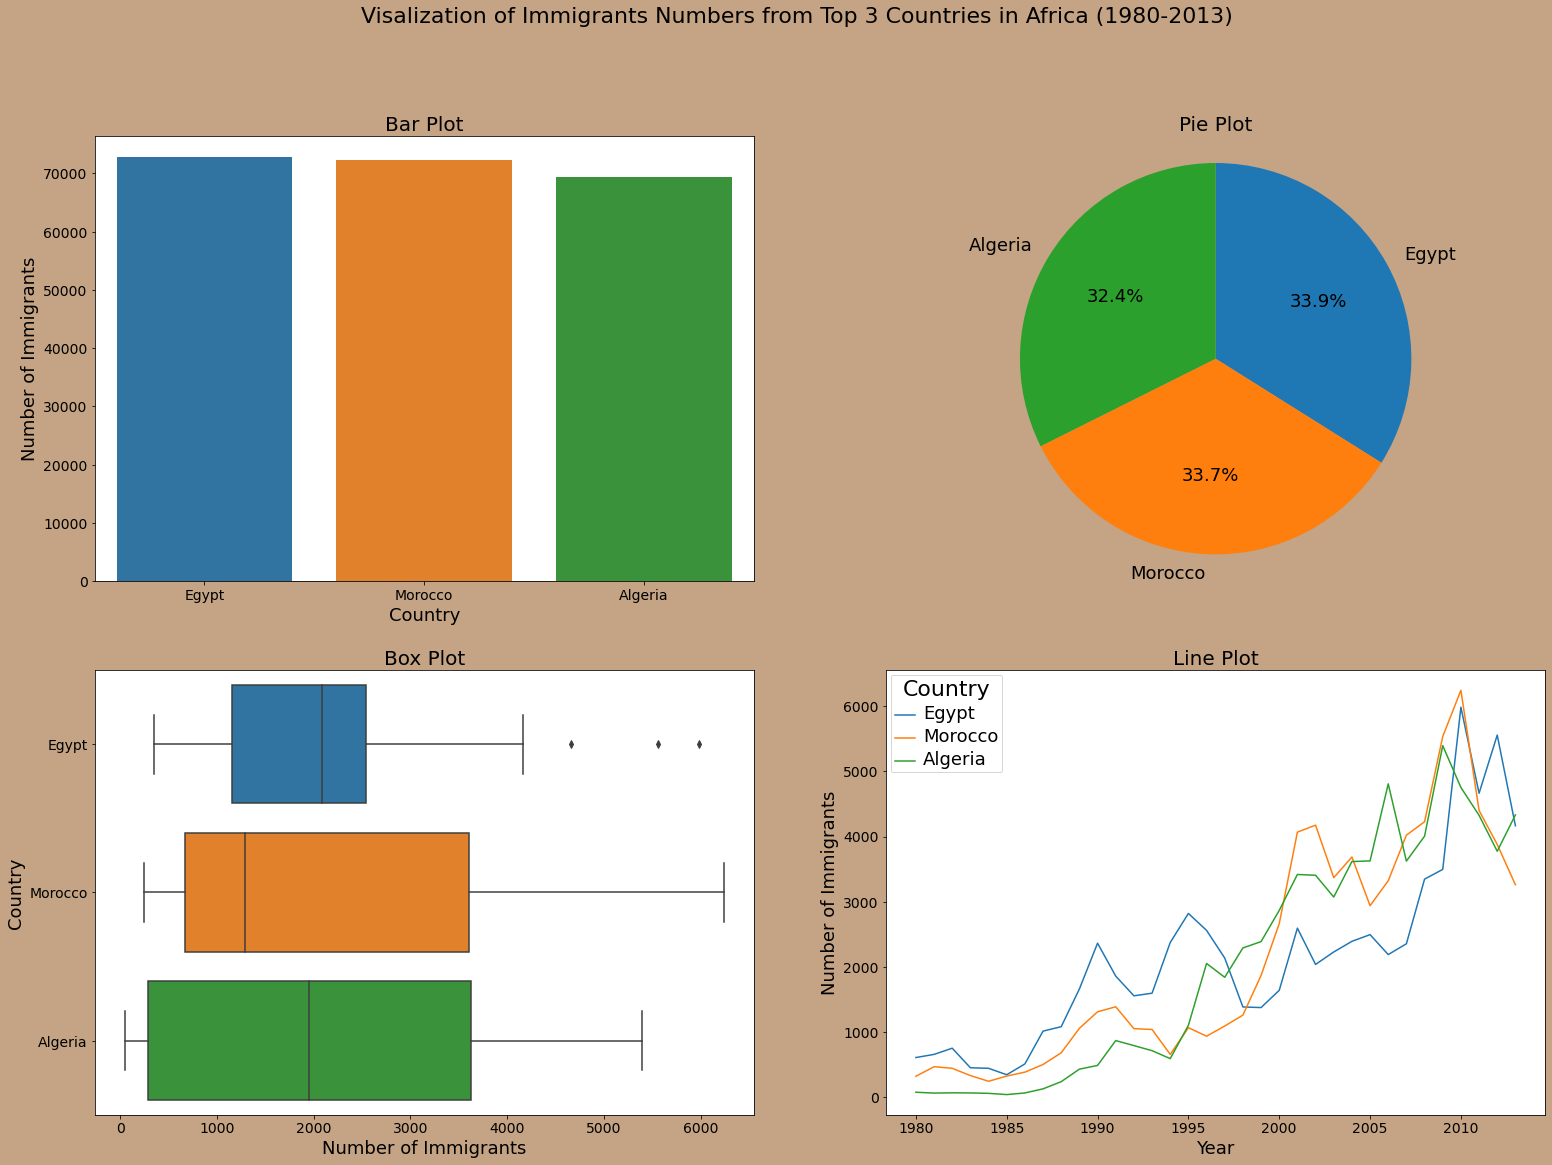

In [37]:
africa_bar_pie_df = make_bar_pie_df('Africa',3)
africa_line_box_df = make_line_box_df('Africa',3)
make_vis(africa_bar_pie_df,africa_line_box_df,'Africa',3)

## ِAnslysis of Immigration from Latin America and the Caribbean

__Latin America and the Caribbean Basic Statistics__

In [14]:
make_basic_continent_stat('Latin America and the Caribbean')

Latin America and the Caribbean Total Immigration Basic Sttaistics


count        33.000000
mean      23186.303030
std       28238.853615
min         653.000000
25%        3205.000000
50%       11193.000000
75%       29659.000000
max      106431.000000
Name: Total, dtype: float64

__Top 3 Countries in Latin America and the Caribbean Basic Statistics__

In [15]:
make_basic_stat('Latin America and the Caribbean',3)

,Jamaica,Haiti,Guyana
count,34.000000,34.000000,34.000000
mean,3130.323529,2494.500000,2228.970588
std,1202.308001,1254.169247,1249.060531
min,1722.000000,1295.000000,656.000000
25%,2324.250000,1655.500000,1279.250000
50%,2579.000000,2090.000000,1863.500000
75%,3839.500000,2744.500000,2968.500000
max,6065.000000,6503.000000,6174.000000


__Visualization of the Immigration Statistics of Top 3 Countries in Latin America and the Caribbea__

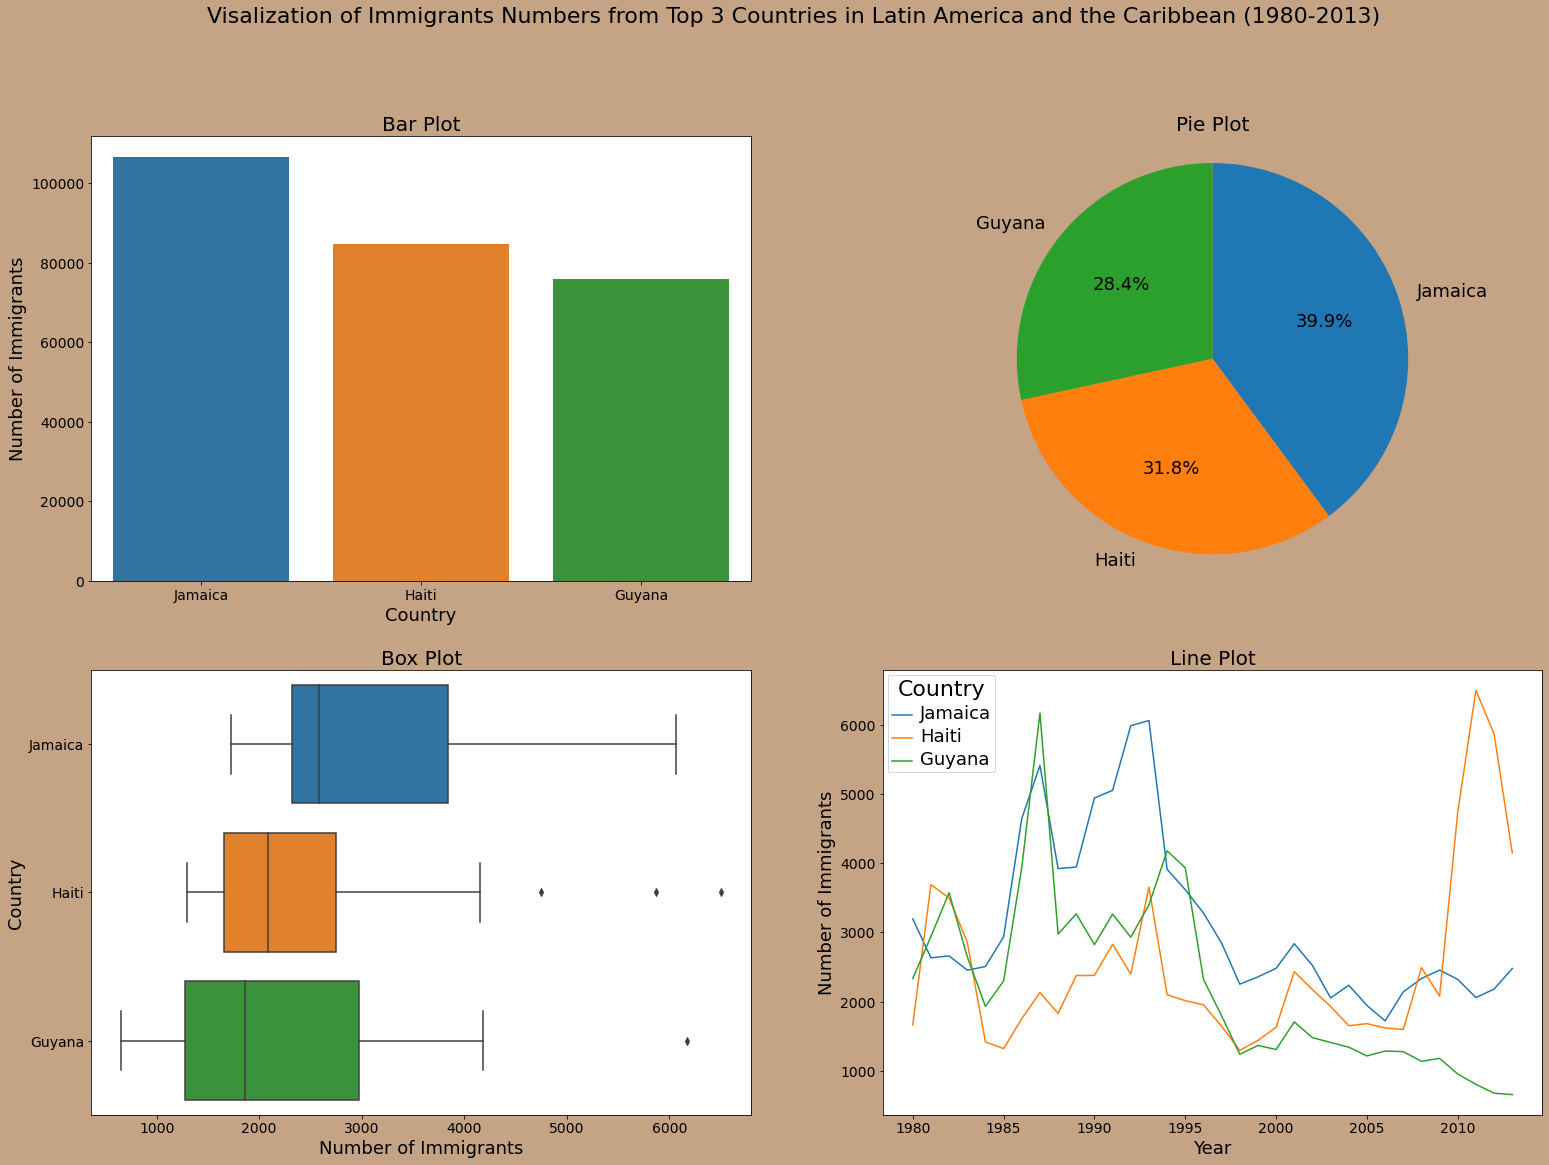

In [16]:
latin_america_bar_pie_df = make_bar_pie_df('Latin America and the Caribbean',3)
latin_america_line_box_df = make_line_box_df('Latin America and the Caribbean',3)
make_vis(latin_america_bar_pie_df,latin_america_line_box_df,'Latin America and the Caribbean',3)

## ِAnslysis of Immigration from Europe

__Europe Basic Statistics__

In [17]:
make_basic_continent_stat('Europe')

Europe Total Immigration Basic Sttaistics


count        43.000000
mean      32812.720930
std       87055.294354
min           5.000000
25%        2132.500000
50%        5963.000000
75%       22239.500000
max      551500.000000
Name: Total, dtype: float64

__Top 2 Countries in Europe Basic Statistics__

In [18]:
make_basic_stat('Europe',2)

,UK,Poland
count,34.000000,34.000000
mean,16220.588235,4095.323529
std,10267.724908,4679.340654
min,5827.000000,720.000000
25%,8088.500000,1288.750000
50%,10092.500000,1679.500000
75%,23691.250000,4742.500000
max,39231.000000,17040.000000


Visualization of the Immigration Statistics of Top 2 Countries in Europe

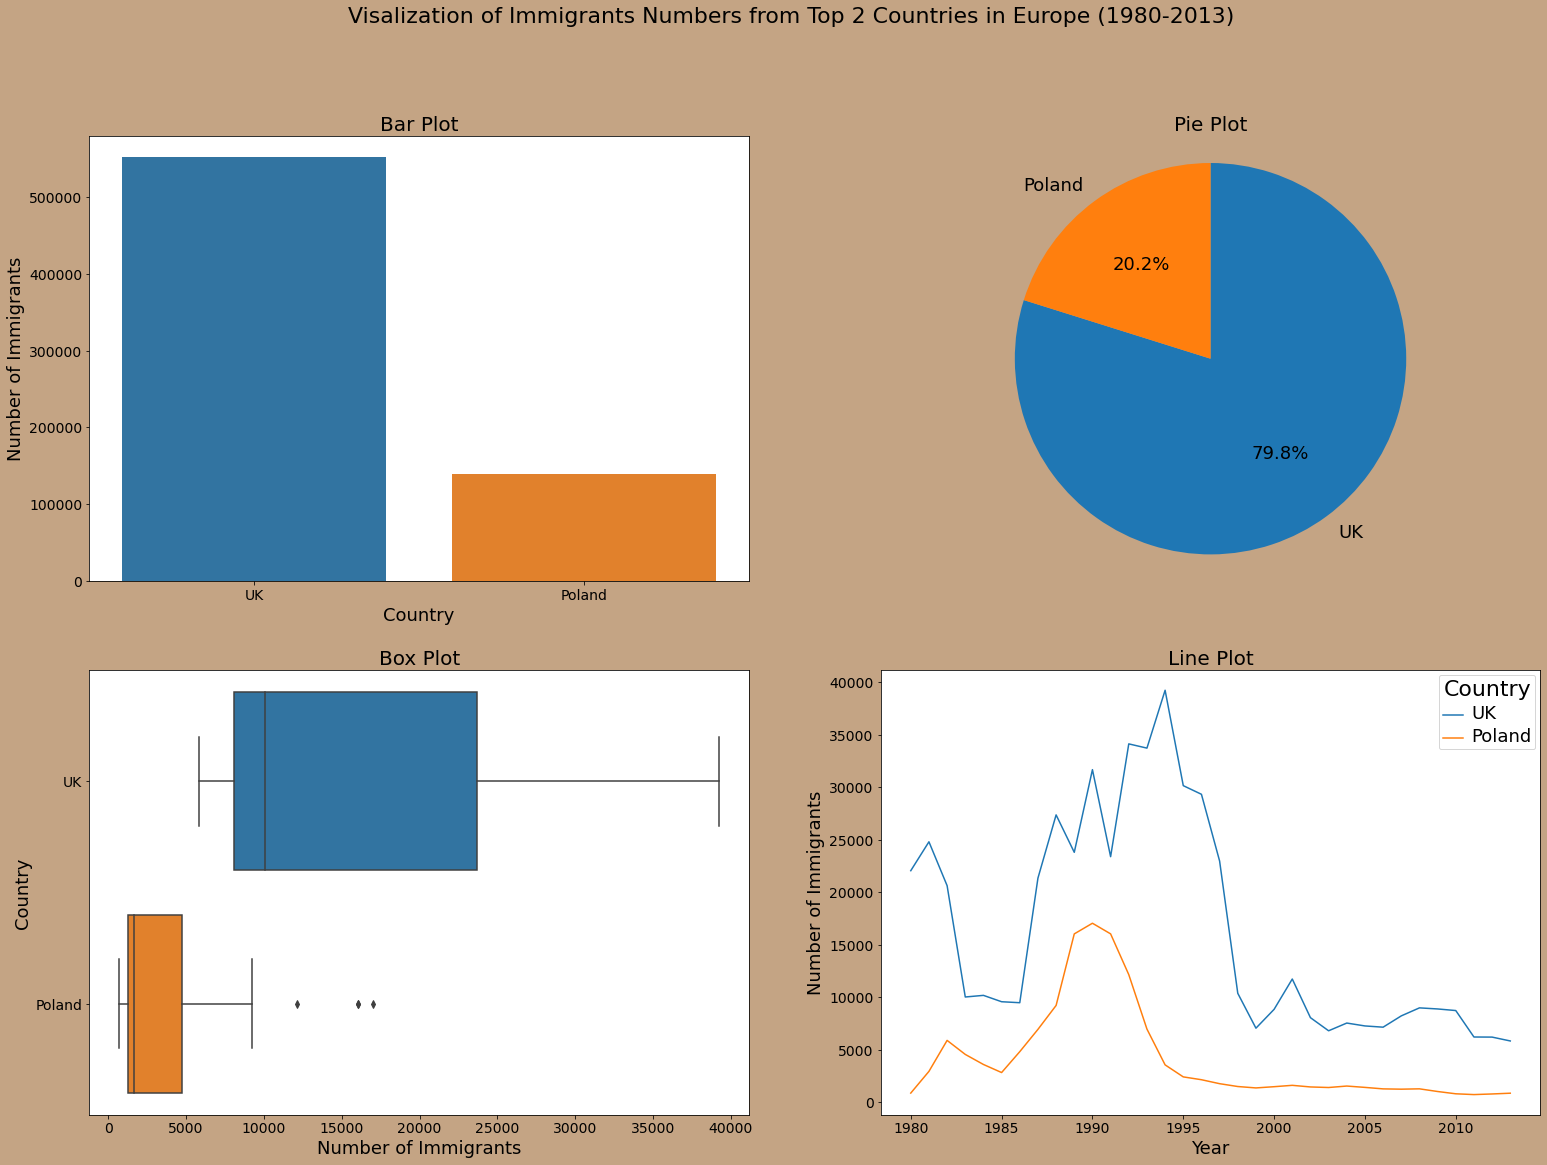

In [19]:
europe_bar_pie_df = make_bar_pie_df('Europe',2)
europe_line_box_df = make_line_box_df('Europe',2)
make_vis(europe_bar_pie_df,europe_line_box_df,'Europe',2)

## ِAnslysis of Immigration from Balkan Countries

__Exploring Immigration from Croatia__

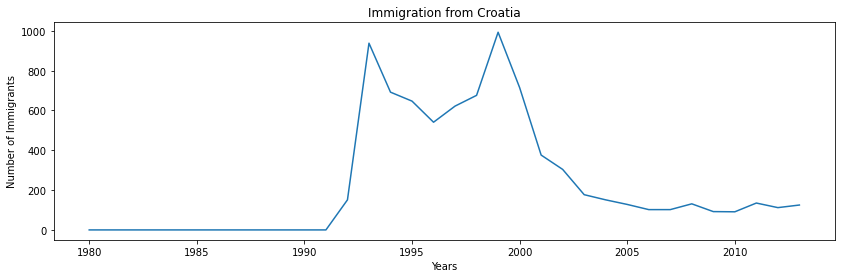

In [20]:
can_df.loc['Croatia', years].plot(figsize=(14,4), title='Immigration from Croatia')
plt.xlabel('Years')
plt.ylabel('Number of Immigrants')
plt.show()

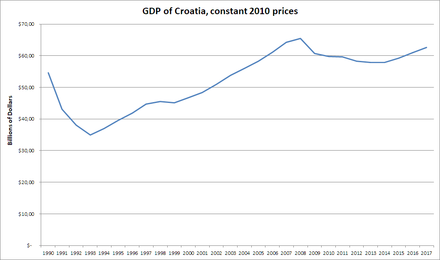

In [21]:
from IPython import display
display.Image("https://upload.wikimedia.org/wikipedia/commons/thumb/f/f3/GDP_of_Croatia_at_constant_prices.png/440px-GDP_of_Croatia_at_constant_prices.png")


It can be seen that immigration from Croatia began in the early 1990s (during the war in Yugoslavia), then number of immigrants started to decrease sharply after the war. Since around 1999, Croatia's GDP started to incease steadily. Perhaps that was why the number of immigrants from Croatia statred to decrease drastically. Interestingly, the immigration numbers were not affected much by the recession of 2008.

__Comparing the Immigration numbers of the 3 major countries in Balkan War__:\
There were 3 major countries involved in that war; Bosnia and Herzegovina, Croatia and Serbia

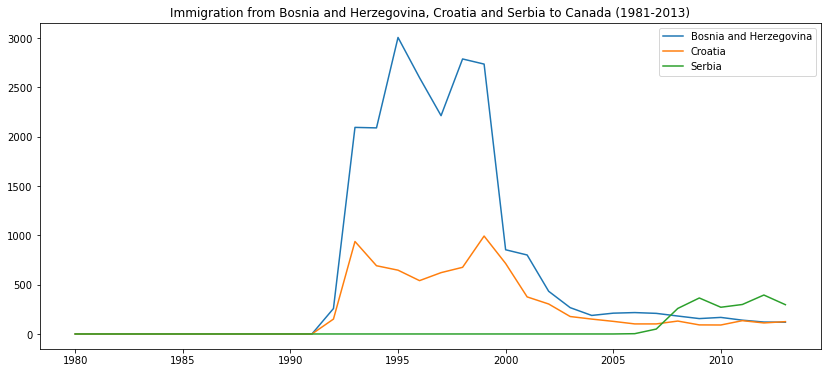

In [68]:
balkan_df = can_df.loc[['Bosnia and Herzegovina','Croatia','Serbia'],years].T
balkan_df.plot(figsize=(14,6), title='Immigration from Bosnia and Herzegovina, Croatia and Serbia to Canada (1981-2013)')
plt.show()

There was no immigration from the 3 countries before 1991 because there were no countries with those names and the Balkan war was the Independence war for Bosnia and Herzegovina and Croatia.

Bosnia and Herzegovina has much higher immgration numbers than Croatia and Serbia in the period of early 1990s till the second half of 2000s.

Immigration from Bosnia and Herzegovina and Croatia started to drop significantly in the second half of 1990s and the trend continued through the 2000s although with much lower slope.

Serbia immgration started to take off in the second half of the 2000s with a bit of fluctuation. In the last few years, Serbia immigration exceeded those of both Bosnia and Herzegovina and Croatia


## Analysis of the Immigration from North America

First, let check what are the countries listed under Northern America

In [29]:
can_df.Continent.value_counts().index

Index(['Africa', 'Asia', 'Europe', 'Latin America and the Caribbean',
       'Oceania', 'Northern America'],
      dtype='object')

In [30]:
can_df[can_df.Continent == 'Northern America'].index

Index(['Canada', 'United States of America'], dtype='object', name='Country')

Interestingly, Canada has a row in the data although the data is for the immigration numbers to Canada. Moreover, according to the data source, Mexico is not among North America countries...what?!! Continent is defined by geography not language.Let's fix that.

In [31]:
can_df.drop('Canada', axis = 0, inplace=True)

In [32]:
can_df.loc['Mexico', 'Continent'] = 'Northern America'

In [33]:
can_df[can_df['Continent']=='Northern America']

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Mexico,Northern America,Central America,Developing regions,409,394,491,490,509,425,667,...,2837,2844,3239,2856,3092,3865,3947,4227,3996,58712
United States of America,Northern America,Northern America,Developed regions,9378,10030,9074,7100,6661,6543,7074,...,8394,9613,9463,10190,8995,8142,7676,7891,8501,241122


Cool! Now, let's explore the relevant data.

__Northern America Basic Statistics__

In [34]:
make_basic_stat('Northern America')

Country,United States of America,Mexico
count,34.000000,34.000000
mean,7091.823529,1726.823529
std,1648.017054,1174.438524
min,4437.000000,394.000000
25%,5676.000000,785.250000
50%,6916.000000,1306.500000
75%,8331.000000,2692.500000
max,10190.000000,4227.000000


__Visualization of the Immigration Statistics from Northern America__

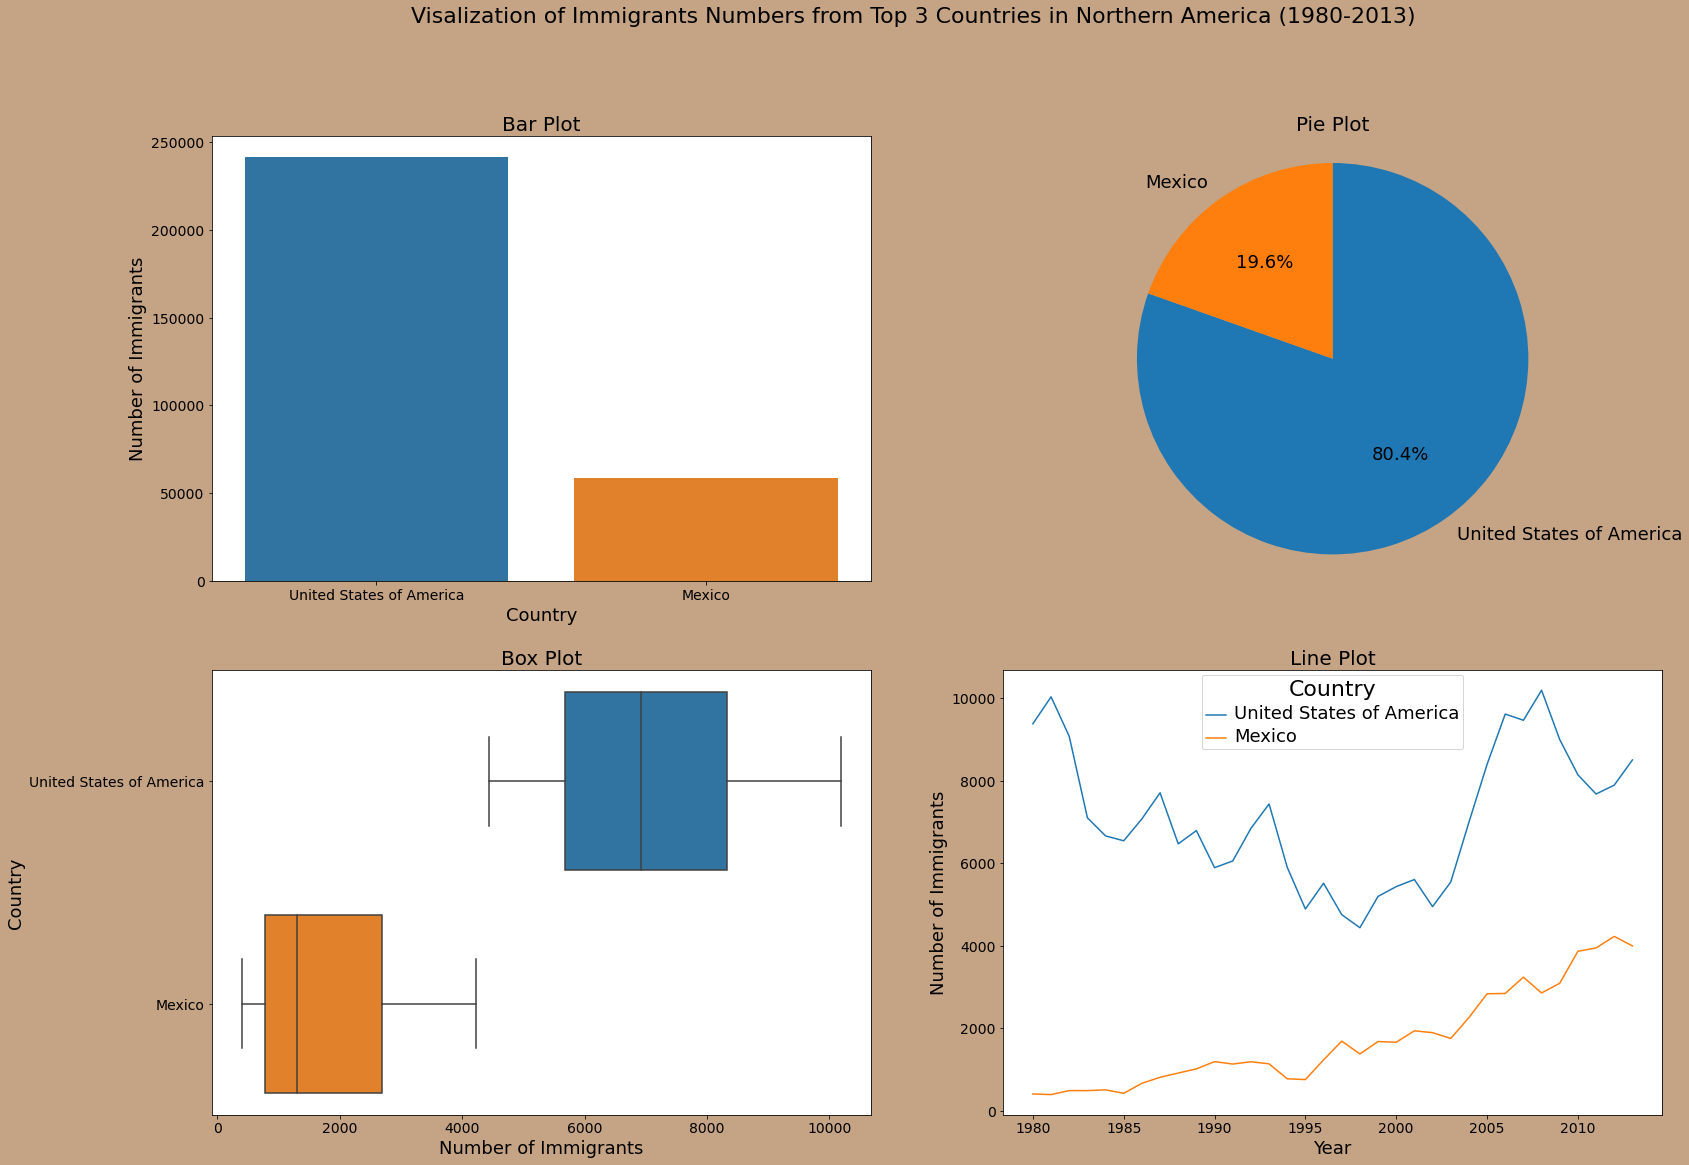

In [35]:
make_vis(make_bar_pie_df('Northern America'),make_line_box_df('Northern America'),'Northern America')

That makes sense. The Untied States of America is much closer to Canda than Mexico. Moreover, USA's citizens can enter Canada and live there until there are qualified for citizenship without any problem due to the agreements bteween the two countries' governments. Furthermore, the culture of Canada and language is close to those of the United States of America.

You know what would be more interesting? Yeah... to compare the number of immigrants from Canada to USA and compare it to that from USA to Canada. That is why I downloaded USA Immigration data.

In [137]:
usa_df = pd.read_excel('../data/United States of America.xlsx',
                       sheet_name='USA by Place of birth',
                       skiprows=range(20),
                       skipfooter=2
                      )
usa_df.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)

usa_df.rename(columns = {'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'},inplace=True)

usa_df['Total'] = can_df.iloc[:,4:].sum(axis=1)

usa_df.set_index('Country', inplace=True)

usa_df.columns = list(map(str, can_df.columns))

usa_df.head(3)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Less developed regions,722,1881,1569,2566,3222,2794,2831,...,4749,3417,1753,2813,3165,2017,1648,1617,2196,NaN
Albania,Europe,Southern Europe,More developed regions,30,11,23,22,32,45,53,...,5947,7914,5737,5754,5137,4711,3612,3364,3186,NaN
Algeria,Africa,Northern Africa,Less developed regions,175,184,190,201,197,202,183,...,1115,1300,1036,1037,1485,1305,1364,1369,1241,NaN


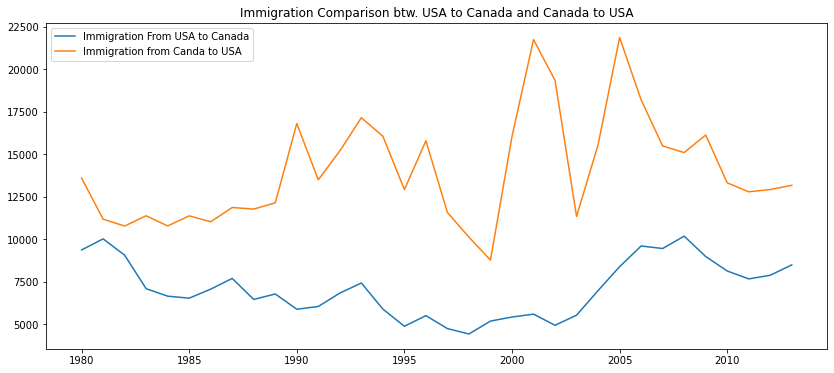

In [145]:
can_df.loc['United States of America', years].plot(label='Immigration From USA to Canada')
usa_df.loc['Canada', years].plot(label = 'Immigration from Canda to USA')
plt.title('Immigration Comparison btw. USA to Canada and Canada to USA')
plt.legend()
plt.show()

That makes sense. USA has bigger economy and warmer climate.

## Analysis of the Immigration from Asia

__Asia and the Caribbean Basic Statistics__

In [69]:
make_basic_continent_stat('Asia')

Asia Total Immigration Basic Sttaistics


count        49.000000
mean      67710.081633
std      153311.733183
min          30.000000
25%        1126.000000
50%        8490.000000
75%       58639.000000
max      691904.000000
Name: Total, dtype: float64

__Basic Statistics of Top 3 Countries in Asia__

In [70]:
make_basic_stat('Asia',3)

,India,China,Philippines
count,34.000000,34.000000,34.000000
mean,20350.117647,19410.647059,15040.911765
std,10007.342579,13568.230790,9506.754936
min,4211.000000,1527.000000,3150.000000
25%,10637.750000,5512.750000,8663.000000
50%,20235.000000,19945.000000,12738.000000
75%,28699.500000,31568.500000,19249.000000
max,36210.000000,42584.000000,38617.000000


__Visualization of the Immigration Statistics of Top 2 Countries in Asia__

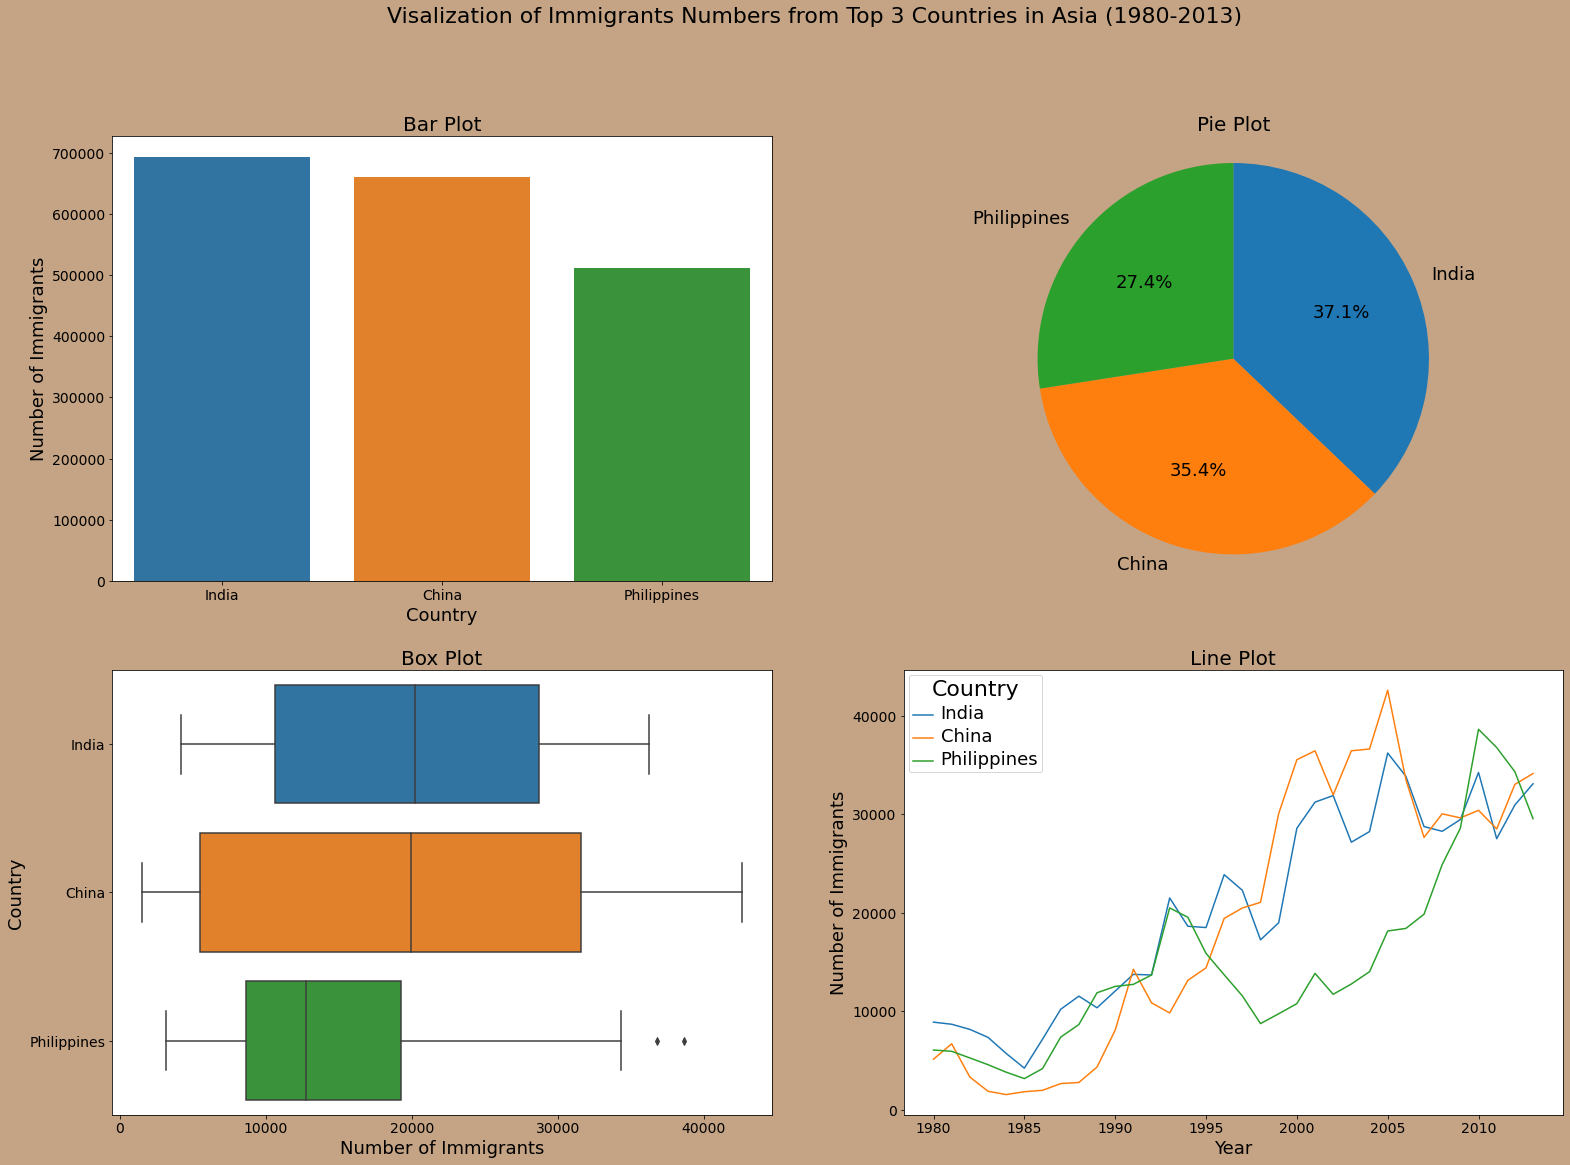

In [71]:
asia_bar_pie_df = make_bar_pie_df('Asia',3)
asia_line_box_df = make_line_box_df('Asia',3)
make_vis(asia_bar_pie_df,asia_line_box_df,'Asia',3)

### Time Series Analysis for the Immigration from Biggest Immigrants Country

In [36]:
import datetime as dt
import itertools
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima.utils import ndiffs
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error

__Identifying the Biggest Country Immigration COuntry__

In [37]:
can_df['Total'].sort_values(ascending=False).head(1).index

Index(['India'], dtype='object', name='Country')

In [71]:
ts = can_df.loc['India',years].to_frame()

ts.head()

,India
1980,8880
1981,8670
1982,8147
1983,7338
1984,5704


__Converting the index to datetime type__

In [76]:
# ts.index = [dt.datetime.strptime(val,"%Y") for val in ts.index]
ts.index = [dt.datetime(int(val),12,31) for val in ts.index]
# ts.index = ts.index.to_period('Y')
ts.rename(columns = {'India':'Number of Immigrants'}, inplace=True)
ts.head()

,Number of Immigrants
1980-12-31,8880
1981-12-31,8670
1982-12-31,8147
1983-12-31,7338
1984-12-31,5704


__Plotting the Time Series__

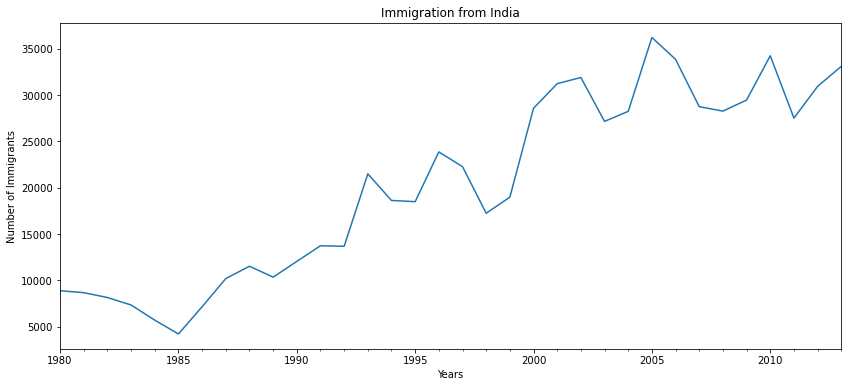

In [77]:
ts['Number of Immigrants'].plot(figsize=(14,6),title='Immigration from India')
plt.xlabel('Years')
plt.ylabel('Number of Immigrants')
plt.show()

__Checking the Stationarity of the Time Series__

In [41]:
# it can be seen from the previous plot that the mean is not constant. So, this time series is not 
# stationary
t_stat,p_value,lags, observation_num,t_critical_vals,ic = sts.adfuller(ts['Number of Immigrants'])
print('P_value: ',p_value)
if p_value <= 0.05:
    print('There is a significant evidence that this time series is stationary')
else:
    print('There is no significant evidence that this time series is stationary')

P_value:  0.8392746310524928
There is no significant evidence that this time series isstationary


Since the time series is not stationary, then AR, MA or ARMA are not suitable models to use here.I'll difference the time series to make it stationary.

__Checking the Seasonality of the Time Series__

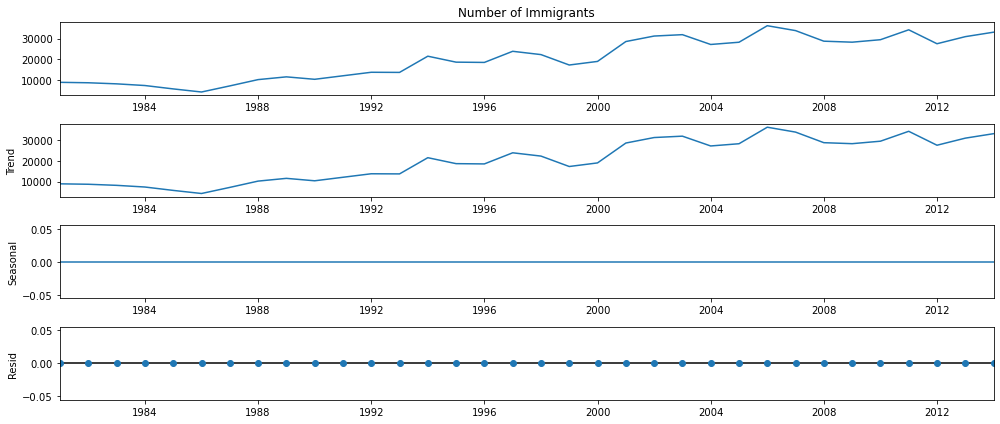

In [42]:
plt.rcParams["figure.figsize"] = (14,6)
seasonal_decompose(ts['Number of Immigrants']).plot()
plt.show()
plt.close()

It can be seen that there is not seasonality in this time series

__Plotting the Autocorrelation Function and the Partial Autocorrelation Function__

C:\ProgramData\Miniconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


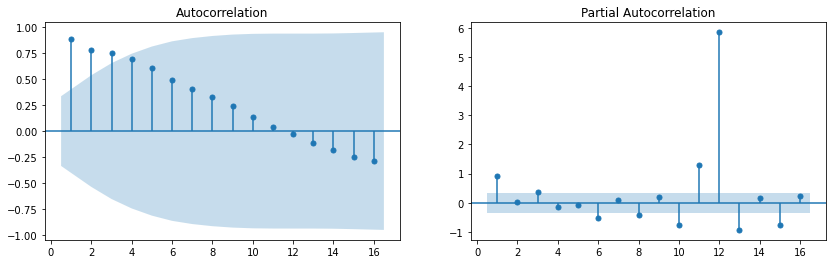

In [83]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,4))
# ax1.plot(ts['Number of Immigrants'])
sgt.plot_acf(ts['Number of Immigrants'],zero=False, ax=ax1)
sgt.plot_pacf(ts['Number of Immigrants'],zero=False, ax=ax2)
plt.show()
plt.close()

__Determining p, d, q values__

__Determining d__

In [84]:
diff_num = ndiffs(ts['Number of Immigrants'], test='adf')
diff_num

1

In [85]:
# it can be seen taht d = 1

__Converting the time series to stationary__

In [86]:
ts_diff = ts.diff(1)[1:]
ts_diff.rename(columns = {'Number of Immigrants':' Difference in NUmber of Immigrants'}, inplace=True)
ts_diff.head()

,Difference in NUmber of Immigrants
1981-12-31,-210
1982-12-31,-523
1983-12-31,-809
1984-12-31,-1634
1985-12-31,-1493


__Checking the Stationarity of the new Time Series__

In [87]:
t_stat,p_value,lags, observation_num,t_critical_vals,ic = sts.adfuller(ts_diff)
print('P_value: ',p_value)
if p_value <= 0.05:
    print('There is a significant evidence that this time series is stationary')
else:
    print('There is no significant evidence that this time series isstationary')

P_value:  1.873804434239198e-08
There is a significant evidence that this time series is stationary


__Determining p__

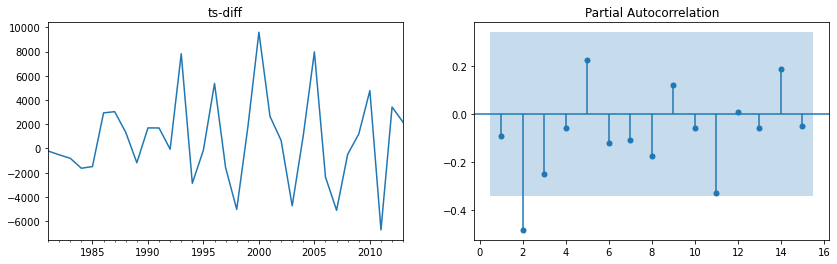

In [88]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,4))

ts_diff.plot(ax = ax1, title = 'ts-diff', legend = False)
sgt.plot_pacf(ts_diff,zero=False, lags=15, ax = ax2)
plt.show()
plt.close()

In [89]:
# from the partial autocorrelation function, it can be seen that p = 2

__Determining q__

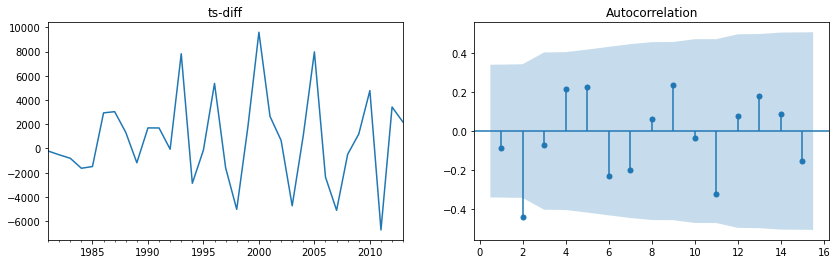

In [90]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,4))

ts_diff.plot(ax = ax1, title = 'ts-diff', legend = False)
sgt.plot_acf(ts_diff,zero=False, lags=15, ax = ax2)
plt.show()
plt.close()

In [91]:
# it can be seen from the partial autocorrelation plot that q = 2

__Splitting the Data__

In [92]:
x_train = ts['Number of Immigrants'].values[0:30] # 30 data point
x_test = ts['Number of Immigrants'].values[30:] # 3 data point

__Fitting the ARIMA Model__

In [93]:
model = ARIMA(x_train, order = (2,1,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   29
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -271.500
Method:                       css-mle   S.D. of innovations           2571.618
Date:                Fri, 22 Apr 2022   AIC                            555.000
Time:                        10:36:09   BIC                            563.204
Sample:                             1   HQIC                           557.569
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        991.6300    108.981      9.099      0.000     778.030    1205.230
ar.L1.D.y     -0.0266      0.196     -0.136      0.892      -0.410       0.357
ar.L2.D.y      0.0566      0.201      0.281      0.7

C:\ProgramData\Miniconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


__Plotting the Residual Errors__

In [94]:
residuals = pd.DataFrame(model_fit.resid)

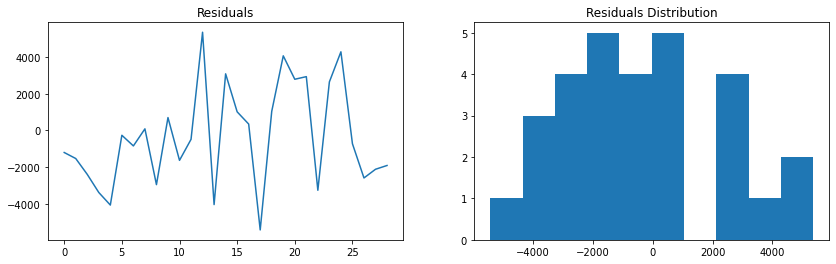

In [95]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,4))

ax1.plot(residuals)
ax1.set_title('Residuals')
ax2.hist(residuals, bins = 10)
ax2.set_title('Residuals Distribution')
plt.show()


__Plotting the Model Predicted Values with the Actual Values__

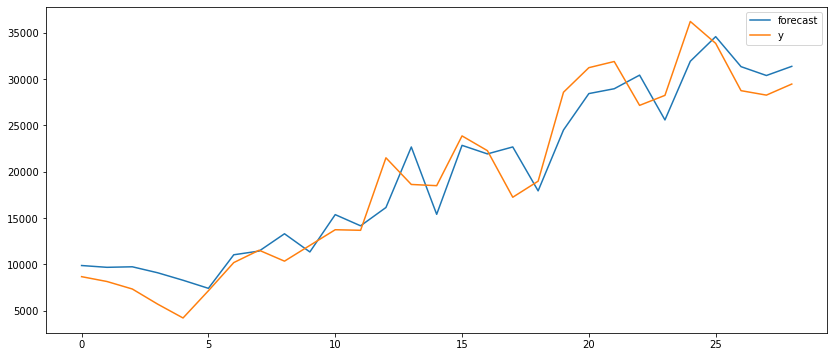

In [96]:
model_fit.plot_predict();

__Forecasting__

In [97]:
steps = 4
fc, se, conf = model_fit.forecast(steps)


In [98]:
fc

array([32476.05076172, 35335.85099   , 36392.50618337, 37488.07867502])

In [99]:
conf

array([[27435.77290726, 37516.32861619],
       [28302.0196722 , 42369.68230781],
       [29356.97708134, 43428.0352854 ],
       [30447.23913786, 44528.91821217]])

In [100]:
conf[:,0]

array([27435.77290726, 28302.0196722 , 29356.97708134, 30447.23913786])

In [101]:
result =  pd.DataFrame({ 'Forecaste':fc,
                        'Lower Forecast Limit':conf[:,0],
                        'Actual':x_test,
                        'Upper Forecast Limit':conf[:,1]})
result 

,Forecaste,Lower Forecast Limit,Actual,Upper Forecast Limit
0,32476.050762,27435.772907,34235,37516.328616
1,35335.850990,28302.019672,27509,42369.682308
2,36392.506183,29356.977081,30933,43428.035285
3,37488.078675,30447.239138,33087,44528.918212


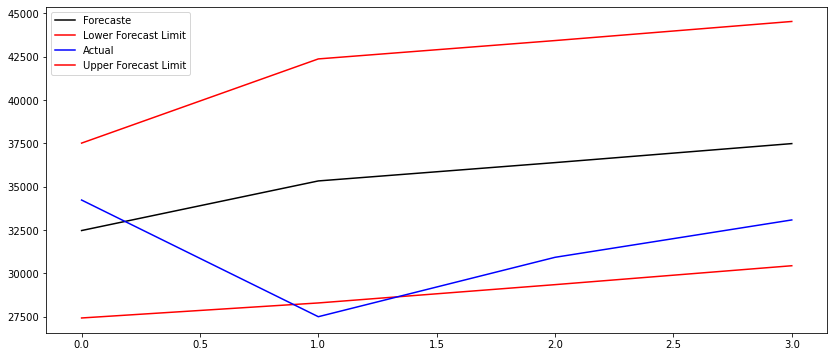

In [102]:
result.plot(color=['black','red','blue','red'])
plt.show()

This model is not very accutate since it goes out of the confidence interval.

### Alternative Better Model using Grid Search

In [103]:
p=d=q=range(0,3)
pdq = list(itertools.product(p,d,q))

In [104]:
param_aic = {}
for param in pdq:
    try:
        model_arima = ARIMA(x_train, order = param)
        model_arima_fit = model_arima.fit()
        param_aic[(param[0],1,param[2])] = model_arima_fit.aic
    except:
        continue  

C:\ProgramData\Miniconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\ProgramData\Miniconda3\lib\site-packages\statsmodels\tsa\tsatools.py:728: RuntimeWarning: divide by zero encountered in log
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
C:\ProgramData\Miniconda3\lib\site-packages\scipy\optimize\_numdiff.py:470: RuntimeWarning: invalid value encountered in subtract
  dx = ((x0 + h) - x0)
C:\ProgramData\Miniconda3\lib\site-packages\scipy\optimize\_numdiff.py:556: RuntimeWarning: invalid value encountered in double_scalars
  dx = x[i] - x0[i]  # Recompute dx as exactly representable number.
C:\ProgramData\Miniconda3\lib\site-packages\statsmodels\tools\numdiff.py:242: RuntimeWarning: invalid value encountered in subtract
  - f(*((x + 1j*ee[i, :] - ee[j, :],)+args),
C:\ProgramData\Miniconda3\lib\site-packages\statsmodels\tsa\tsatool

In [105]:
best_param = min(param_aic, key= param_aic.get)
best_param,param_aic[best_param]

((2, 1, 1), 544.1844911434939)

In [106]:
model1 = ARIMA(x_train, order = best_param)
model_fit1 = model1.fit()
print(model_fit1.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   29
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -273.778
Method:                       css-mle   S.D. of innovations           3013.143
Date:                Fri, 22 Apr 2022   AIC                            557.556
Time:                        10:36:22   BIC                            564.392
Sample:                             1   HQIC                           559.697
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        794.4535    333.770      2.380      0.017     140.276    1448.631
ar.L1.D.y      0.2409      0.353      0.682      0.495      -0.451       0.933
ar.L2.D.y     -0.4942      0.157     -3.148      0.0

__Plotting the Mdodel Predicted Values with the Actual Values__

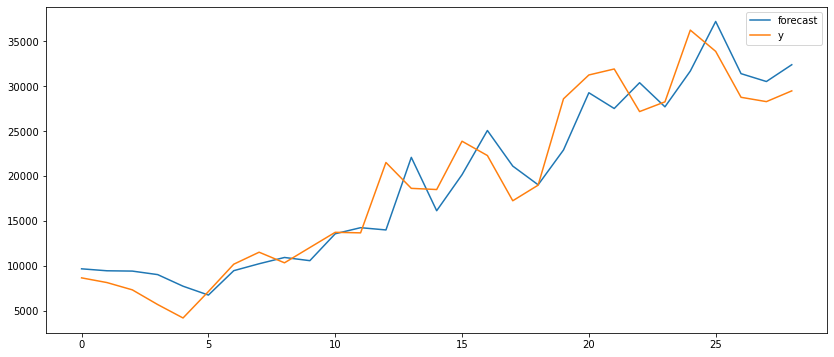

In [107]:
model_fit1.plot_predict();

In [108]:
steps = 4
fc1, se1, conf1 = model_fit1.forecast(steps)

In [131]:
result1 =  pd.DataFrame({ 'Forecaste':fc1,
                        'Lower Forecast Limit':conf1[:,0],
                        'Actual':x_test,
                        'Upper Forecast Limit':conf1[:,1]})
result1.index = ts['Number of Immigrants'][30:].index
result1

,Forecaste,Lower Forecast Limit,Actual,Upper Forecast Limit
2010-12-31,31884.872968,25979.220254,34235,37790.525682
2011-12-31,32875.026434,24815.769719,27509,40934.283149
2012-12-31,32908.807391,24481.399800,30933,41336.214982
2013-12-31,33423.319384,24774.482961,33087,42072.155806


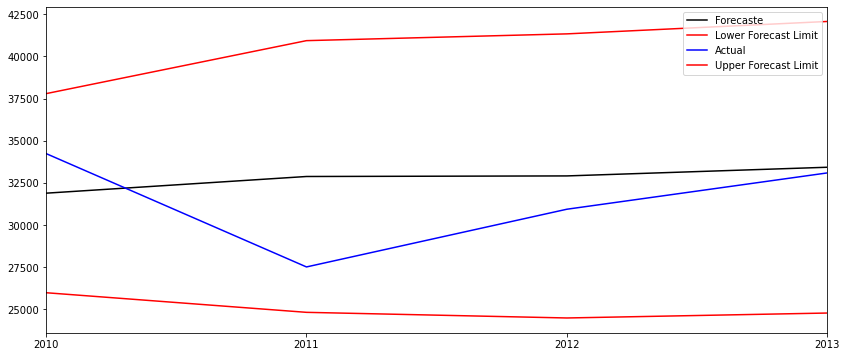

In [129]:
result1.plot(color=['black','red','blue','red'])
plt.show()

This is a better model as it fits within the confidence intervals.